## PM3 - Data Cleaning & Exploration
Anna Lieb  
5/3/2022

Clean and explore the Reddit data collected in PM3 - Data Collection phase. 

### Table of contents
1. [Load data & remove duplicates](#sec1)
2. [Identify most common subreddits](#sec2)
3. [Identify most common words (excluding stopwords)](#sec3)
4. [Characterize post length](#sec4)
5. [Get posts from most common subreddits](#sec5)

<a id="sec1"></a>
## 1. Load data and remove duplicates

Read Reddit data for comments and submissions from csv files and load them into pandas dataframes. Then, combine the data and remove duplicates. 

In [1]:
import pandas as pd # for data handling and storage
import random

In [2]:
# dataframe for all comments
RC_06_df = pd.read_csv ('Data.nosync/Extracted/RC_2021-06_extracted.csv')
RC_05_df = pd.read_csv ('Data.nosync/Extracted/RC_2021-05_extracted.csv')
RC_04_df = pd.read_csv ('Data.nosync/Extracted/RC_2021-04_extracted.csv')
RC_03_df = pd.read_csv ('Data.nosync/Extracted/RC_2021-03_extracted.csv')

In [3]:
# dataframe for all submissions
RS_06_df = pd.read_csv ('Data.nosync/Extracted/RS_2021-06_extracted.csv')
RS_05_df = pd.read_csv ('Data.nosync/Extracted/RS_2021-05_extracted.csv')
RS_04_df = pd.read_csv ('Data.nosync/Extracted/RS_2021-04_extracted.csv')
RS_03_df = pd.read_csv ('Data.nosync/Extracted/RS_2021-03_extracted.csv')

In [4]:
# combine the comment dataframes
all_RC = pd.concat([RC_06_df, RC_05_df, RC_04_df, RC_03_df])

# remove posts with duplicate text
RC_without_duplicates = all_RC.drop_duplicates(subset=['body'])
display(RC_without_duplicates)

,created_utc,author,body,subreddit,id,permalink
0,1622505638,MuletTheGreat,What? You adapt the data from both sets and us...,CoronavirusDownunder,h04y0n3,/r/CoronavirusDownunder/comments/noxsmf/covids...
1,1622505754,anonymous-shmuck,"Amazon, like any company, is after profits and...",wallstreetbets,h04y8a3,/r/wallstreetbets/comments/npbyt0/what_are_you...
2,1622505862,joekerr37,I'd refer you to /coronavirus if you want to d...,jimmydore,h04yfc5,/r/jimmydore/comments/no0kvn/is_anyone_else_wo...
3,1622505979,Bandefaca,I’m personally pretty excited about the prospe...,shroomstocks,h04yn0k,/r/shroomstocks/comments/npazhn/tryp_therapeut...
4,1622506241,ArcticKnight79,&gt;What? You adapt the data from both sets an...,CoronavirusDownunder,h04z4k9,/r/CoronavirusDownunder/comments/noxsmf/covids...
...,...,...,...,...,...,...
26438,1617234517,daytripper7711,I agree that they are out for money. However I...,Drugs,gsz1frf,/r/Drugs/comments/mhas0i/the_us_government_has...
26439,1617234620,gloria1203,"Oh, girl, if you want to make any arguments, p...",korea,gsz1mpi,/r/korea/comments/mgd4u9/bts_speak_out_on_anti...
26440,1617234708,pease_pudding,"Right, but Little Snitch is just an applicatio...",privacy,gsz1smo,/r/privacy/comments/mhgh43/i_use_ublock_origin...
26441,1617234921,unclebobsucks,Your first paragraph is good. I wish you'd sto...,privacy,gsz2713,/r/privacy/comments/mh7bbf/florida_gov_desanti...


In [5]:
# combine the submission dataframes
all_RS = pd.concat([RS_06_df, RS_05_df, RS_04_df, RS_03_df])

# remove posts with duplicate text
RS_without_duplicates = all_RS.drop_duplicates(subset=['title'])
display(RS_without_duplicates)

,created_utc,author,title,selftext,subreddit,id,permalink
0,1622506663,[deleted],"""We know what you did during lockdown"" is an e...",[deleted],LateStageCapitalism,nph71n,/r/LateStageCapitalism/comments/nph71n/we_know...
2,1622507247,yogthos,"""We know what you did during lockdown"" is an e...",NaN,canadaleft,nphdzc,/r/canadaleft/comments/nphdzc/we_know_what_you...
4,1622516446,wavesdownonthebeach,ETC 2.0 data sharing and privacy,In our last car we had good old fashioned ETC ...,japanlife,npk5to,/r/japanlife/comments/npk5to/etc_20_data_shari...
5,1622526201,2me2u2me2u,If a hacker accessed your personal data what i...,NaN,AskReddit,npmu65,/r/AskReddit/comments/npmu65/if_a_hacker_acces...
6,1622540293,Fun-Relief9440,LPT: You should know that WhatsApp is changing...,[removed],LifeProTips,npq3pv,/r/LifeProTips/comments/npq3pv/lpt_you_should_...
...,...,...,...,...,...,...,...
558,1617216412,speckz,Apple amongst companies lobbying against Right...,NaN,technology,mhcsyv,/r/technology/comments/mhcsyv/apple_amongst_co...
561,1617219361,[deleted],Am I able to request blockfi to delete my pers...,[deleted],blockfi,mhduoc,/r/blockfi/comments/mhduoc/am_i_able_to_reques...
563,1617221996,jo_blow_,I’ve been curious about the privacy of my iPho...,"I’m kind of a newb at this sort of thing, but ...",privacy,mheryz,/r/privacy/comments/mheryz/ive_been_curious_ab...
564,1617229386,Yh1983,Google Keep is one of the most used apps in my...,NaN,iphone,mhhaq1,/r/iphone/comments/mhhaq1/google_keep_is_one_o...


In [7]:
# create lists that isolate columns for text body and subreddit

# for comments
RC_text_list = RC_without_duplicates["body"].tolist()
RC_subreddit_list = RC_without_duplicates["subreddit"].tolist()

# for submissions
RS_text_list = RS_without_duplicates["title"].tolist()
RS_subreddit_list = RS_without_duplicates["subreddit"].tolist()

# view a sample of comment data
for i in range(10): 
    ind = random.randint(0, len(RC_text_list))
    print(f"-------------- Random comment #{i + 1} from subreddit r/{RC_subreddit_list[ind]} --------------")
    print(RC_text_list[ind])
    
# view a sample of submission title data
for i in range(10): 
    ind = random.randint(0, len(RS_text_list))
    print(f"-------------- Random comment #{i + 1} from subreddit r/{RS_subreddit_list[ind]} --------------")
    print(RS_text_list[ind])

-------------- Random comment #1 from subreddit r/SteamVR --------------
&gt; Dude, throwing out all this hyperbole convinces no one and only makes you look crazy.

The only hyperbole I put out was my overexaggerating of the Zuck wanting to butt fuck me or put micro cameras around my house, but ok!
&gt; Facebook and Zuckerburg have proven time and again that they do not care about privacy, will sell every bit of your data 

While they may have definitely proven they're willing to sell your information, I have yet to see any real reason I should view this as being "evil", just kind of shitty.

&gt; they can and will use said data to to manipulate you and others with false information, and even worse they will sell your information to people or organizations that seriously want to do you ill.

How are they going to manipulate me? I literally don't use Facebook for anything else. How are they going to manipulate me (this is a legitimate question, and I'm asking you to help explain as you 

In [54]:
all_text_list = RC_text_list + RS_text_list
all_sub_list = RC_subreddit_list + RS_subreddit_list

# write random sample to a text file to qualitatively find relevance rate
with open("Data.nosync/100_random.csv", "w") as outF:
    writer = csv.writer(outF)
    writer.writerow(["subreddit", "text", "relevant?"])
    for i in range (100): 
        ind = random.randint(0, len(all_text_list))
        writer.writerow([all_sub_list[ind], all_text_list[ind]])

<a id="sec2"></a>
## 2. Identify most common subreddits

In [9]:
# get most common subreddits
from collections import Counter
import csv
import os

# list of all subreddits in comments and submissions
all_subreddits = RC_subreddit_list + RS_subreddit_list

subCounter = Counter(all_subreddits)
  
# most_common() produces k=200 most frequent
# subreddits and their respective counts.
most_occur = subCounter.most_common(200)
print(most_occur[:10]) # top 10 subreddits
print(f"Number of distinct subreddits: {len(subCounter)}")

outFilePath = "Data.nosync/common_subreddits.csv"

# write 200 top subreddits to a .csv file
if not os.path.exists(outFilePath): 
    with open(outFilePath, "w") as outF: 
        writer = csv.writer(outF)
        writer.writerow(["subreddit", "count"])
        for sub in most_occur: 
            writer.writerow(sub)

else: 
    print(f"{outFilePath} already exists")

[('technology', 2327), ('privacy', 2297), ('AskReddit', 1764), ('CryptoCurrency', 1158), ('apple', 1140), ('politics', 1001), ('news', 983), ('worldnews', 956), ('Superstonk', 771), ('privacytoolsIO', 754)]
Number of distinct subreddits: 10808
Data.nosync/common_subreddits.csv already exists


<a id="sec3"></a>
## 3. Identify most common words

In [15]:
import string
import nltk
from nltk.tokenize import wordpunct_tokenize

stopwordsList = nltk.corpus.stopwords.words('english')
punctuation = string.punctuation
# junk words identified from exploration
other_junk = ["’", "://", "https", ").", "**", "),", "...", '“', 'amp', 'gt', '](', 'www']

def cleanPost(postStr):
    """Given a string of a Reddit post, tokenize and 
    clean it up to use for further analysis.
    Returns a list of tokens.
    """
    # lowercase
    lowerPost = postStr.lower()
    
    #tokenize
    tokens = wordpunct_tokenize(lowerPost)
    
    #remove stopwords and punctuation
    cleanTokens = [w for w in tokens if w not in stopwordsList + list(punctuation) + other_junk]
    return cleanTokens

In [16]:
# list of reddit comments and submissions
RC_text_list = RC_without_duplicates["body"].tolist()
RS_text_list = RS_without_duplicates["title"].tolist()
all_text = RC_text_list + RS_text_list

words = []

# clean and tokenize comments to create list of words
for i, doc in enumerate(all_text): 
    words.extend(cleanPost(doc))
    
print(words[:20])

wordCounter = Counter(words)
  
# most_common() produces k=200 most frequent
# subreddits and their respective counts.
most_occur = wordCounter.most_common(200)

outFilePath = "Data.nosync/common_words.csv"

if not os.path.exists(outFilePath): 
    with open(outFilePath, "w") as outF: 
        writer = csv.writer(outF)
        writer.writerow(["word", "count"])
        for word in most_occur: 
            writer.writerow(word)

else: 
    print(f"{outFilePath} already exists")

['adapt', 'data', 'sets', 'user', 'overlaps', 'improve', 'confidence', 'results', 'third', 'app', 'personal', 'journal', 'financial', 'receipts', 'would', 'add', 'evidence', 'covidsafe', 'offers', 'set']


<a id="sec4"></a>
## 4. Post length

In [17]:
from matplotlib import pyplot as plt

In [19]:
# list of reddit comments and submissions
RC_text_list = RC_without_duplicates["body"].tolist()
RS_text_list = RS_without_duplicates["title"].tolist()
all_text = RC_text_list + RS_text_list

postLengths = [] # counter for post lengths
total = 0 # keep track of total to calculate mean
for doc in all_text: 
    words = doc.split()
    length = len(words)
    postLengths.append(length)
    total += length
    
avg = total / len(RC_text_list)

# print summary stats
print(f'average length: {round(avg)}')
print(f'max: {max(postLengths)} min: {min(postLengths)}')

average length: 224
max: 2137 min: 1


In [20]:
# make buckets of range = 50 words
buckets = lambda value: (value // 50) * 50 # notice integer division operator // that floors a value
histogram = Counter([buckets(length) for length in postLengths])
print(histogram)

Counter({50: 23066, 0: 18904, 100: 16652, 150: 11364, 200: 8308, 250: 5730, 300: 4149, 350: 3254, 400: 2372, 450: 1945, 500: 1593, 550: 1351, 600: 1052, 650: 911, 700: 780, 750: 699, 800: 553, 850: 514, 900: 456, 950: 393, 1000: 356, 1050: 312, 1100: 310, 1150: 267, 1400: 252, 1200: 222, 1350: 197, 1250: 177, 1450: 168, 1300: 161, 1500: 131, 1550: 110, 1650: 72, 1600: 68, 1700: 38, 1750: 21, 1800: 12, 2100: 1, 1900: 1})


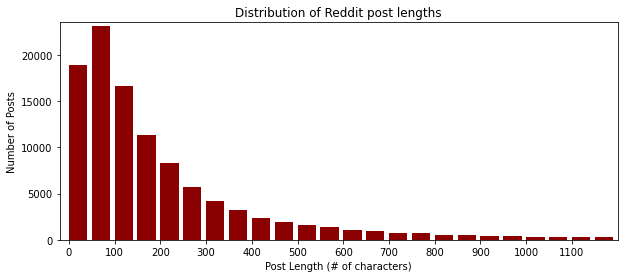

Note: 1631 posts with greater than 1200 characters are not included in this chart.
The average post length was 224 words.
The max length was 2137 words, and the min length was 1 word.


In [26]:
plt.figure(figsize=(10, 4))  # width:20, height:3

plt.bar(histogram.keys(), 
        histogram.values(),
        width=40, color='darkred', align='edge') 

plt.axis([-20, 1200, 0, 23500]) # set axis values
plt.xticks([100 * i for i in range(12)])

plt.xlabel("Post Length (# of characters)")
plt.ylabel("Number of Posts") 
plt.title("Distribution of Reddit post lengths") 

plt.show()

# calculate the number of values excluded from the histogram
numExcluded = 0
for i in range(1200, 2101, 50): 
    numExcluded += histogram[i]
    
print(f"Note: {numExcluded} posts with greater than 1200 characters are not included in this chart.")
print(f"The average post length was {round(avg)} words.")
print(f"The max length was {max(postLengths)} words, and the min length was {min(postLengths)} word.")

<a id="sec5"></a>
## 5. Get posts from most common subreddits

Create two new .csv files that contain comments and submissions from the 200 top subreddits. These posts may be more relevant than posts from less common one-off subreddits. 

We can use this subset of data in the LDA topic modeling stage to see if it produces more interpretable results than the whole corpus.

In [51]:
# dataframe of top 200 subreddits
topSubs = pd.read_csv("Data.nosync/common_subreddits.csv")
# list of top 200 subreddits
topSubs_list = topSubs["subreddit"].tolist()

# create new dataframes that only contain posts from top subreddits
RC_topSubs = RC_without_duplicates[RC_without_duplicates['subreddit'].isin(topSubs_list)]
print(f'dimensions of filtered comments: {RC_topSubs.shape}')
RS_topSubs = RS_without_duplicates[RS_without_duplicates['subreddit'].isin(topSubs_list)]
print(f'dimensions of filtered submissions: {RS_topSubs.shape}')

dimensions of filtered comments: (48306, 6)
dimensions of filtered submissions: (584, 7)


In [52]:
RC_outFilePath = "Data.nosync/RC_from_topSubs.csv"
RS_outFilePath = "Data.nosync/RS_from_topSubs.csv"

# write 200 top subreddits to a .csv file
if not os.path.exists(RC_outFilePath) and not os.path.exists(RS_outFilePath):
    RC_topSubs.to_csv(RC_outFilePath, index=False)
    RS_topSubs.to_csv(RS_outFilePath, index=False)

else: 
    print(f"{outFilePath} already exists")

In [55]:
posts_topSubs = RC_topSubs + RS_topSubs
text_topSubs = RC_topSubs["body"].tolist() + RS_topSubs["title"].tolist()
subs_topSubs = RC_topSubs["subreddit"].tolist() + RS_topSubs["subreddit"].tolist()

# write random sample to a text file to qualitatively find relevance rate
with open("Data.nosync/100_random_topSubs.csv", "w") as outF:
    writer = csv.writer(outF)
    writer.writerow(["subreddit", "text", "relevant?"])
    for i in range (100): 
        ind = random.randint(0, len(posts_topSubs))
        writer.writerow([subs_topSubs[ind], text_topSubs[ind]])